In [1]:
from matplotlib import pyplot as plt
from SOM import SOM,optimize_params,calculate_accuracy,load_dataset,split_train_test
import numpy as np

In [4]:
"""First, Loading the right dataset, then scaling the datas, using the MinMaxscaler from sklearn"""

from sklearn.preprocessing import MinMaxScaler
dataset_ids =   {
                "students": 697,
                "wine": 109,
                "magic": 159,
                "balance-scale": 12,
                "glass": 42,
                "zoo": 111,
                "waveform": 107,
                "image-segmentation": 50,
                "blood": 176,
                "spect": 95,
                "yeast": 110,
                "monk": 70,
                "ecoli": 39,
                "iris": 53,
                "contraception": 30,
                "fertility": 244,
                "conn-bench-sonar":  151,
                "landsat": 146,
                "ionosphere": 52,
                "letter": 59,
                }


x, _, y, _ = load_dataset(id = dataset_ids["landsat"])

scaler_minmax = MinMaxScaler()
x = scaler_minmax.fit_transform(x)


X,Y,X_test,Y_test = split_train_test(x,y,train_ratio=0.8)


data url:
 https://archive.ics.uci.edu/static/public/146/data.csv


In [5]:
"""Just to check the sizes, number of erguments etc..."""

print(len(X))
print(len(X[0]))
#print(X[0])
#print(Y)

5148
36


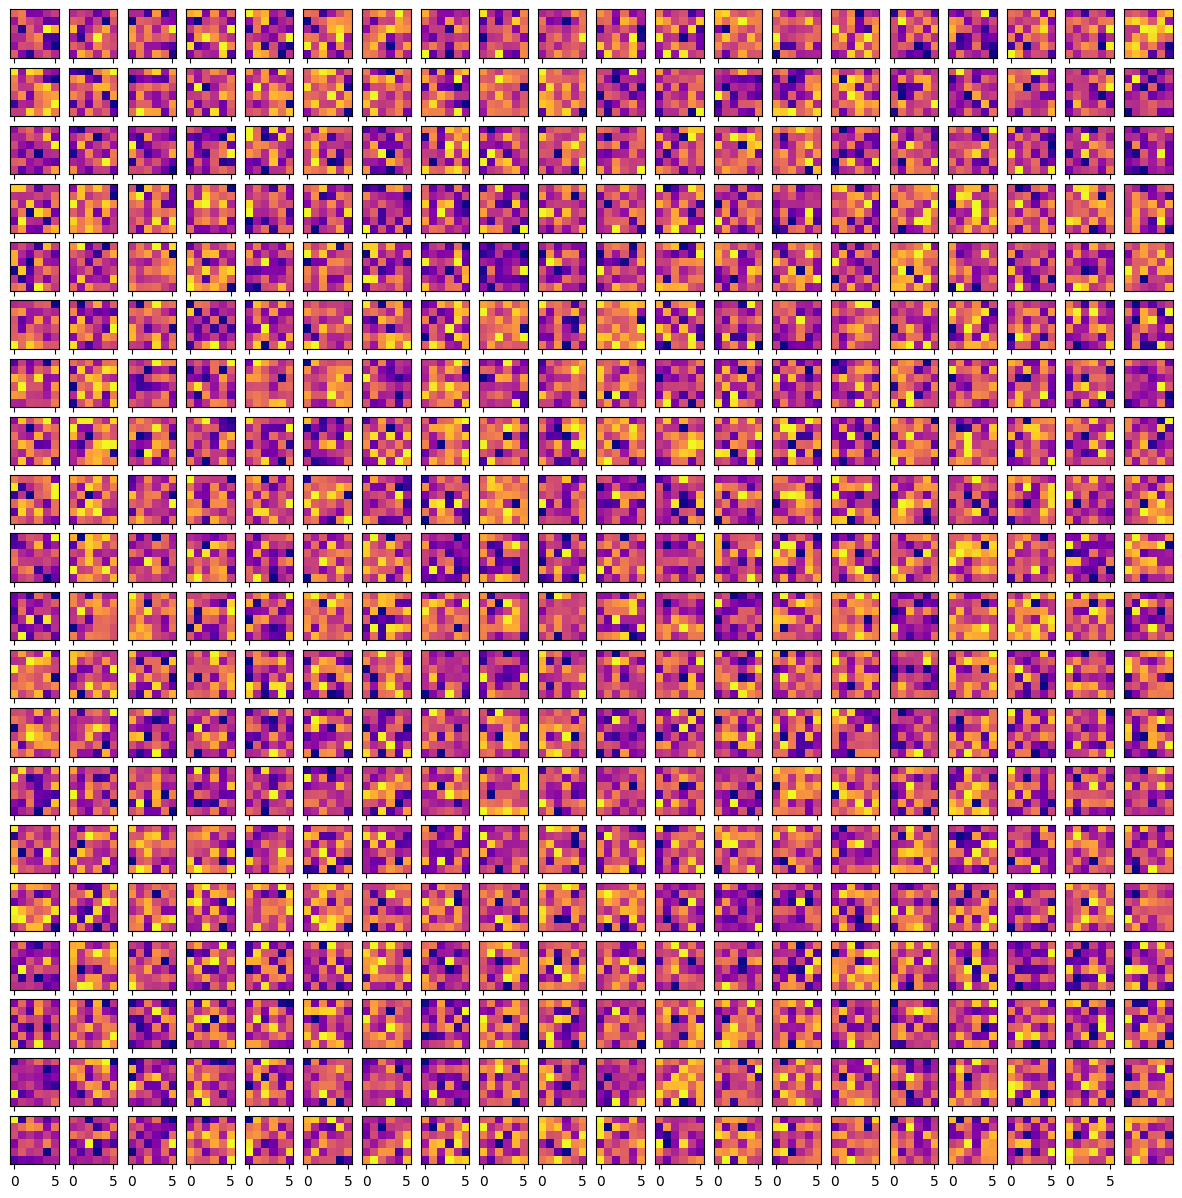

In [6]:
"""Creating a Self organizing map, with some arguments to choose (see the class SOM inplemented in SOM.py for more details)"""
Mon_som = SOM(len(X[0]),20, 20, 0.05, 0.05, 20, 0.05)

"""Using the plot_SOM method to plot the neuron map (which is random for now) : it can take some time"""
Mon_som.plot_SOM([6,6])


In [7]:
"""Then, using the method train_SOM to train the Self Organizing Map"""

Mon_som.train_SOM(X)

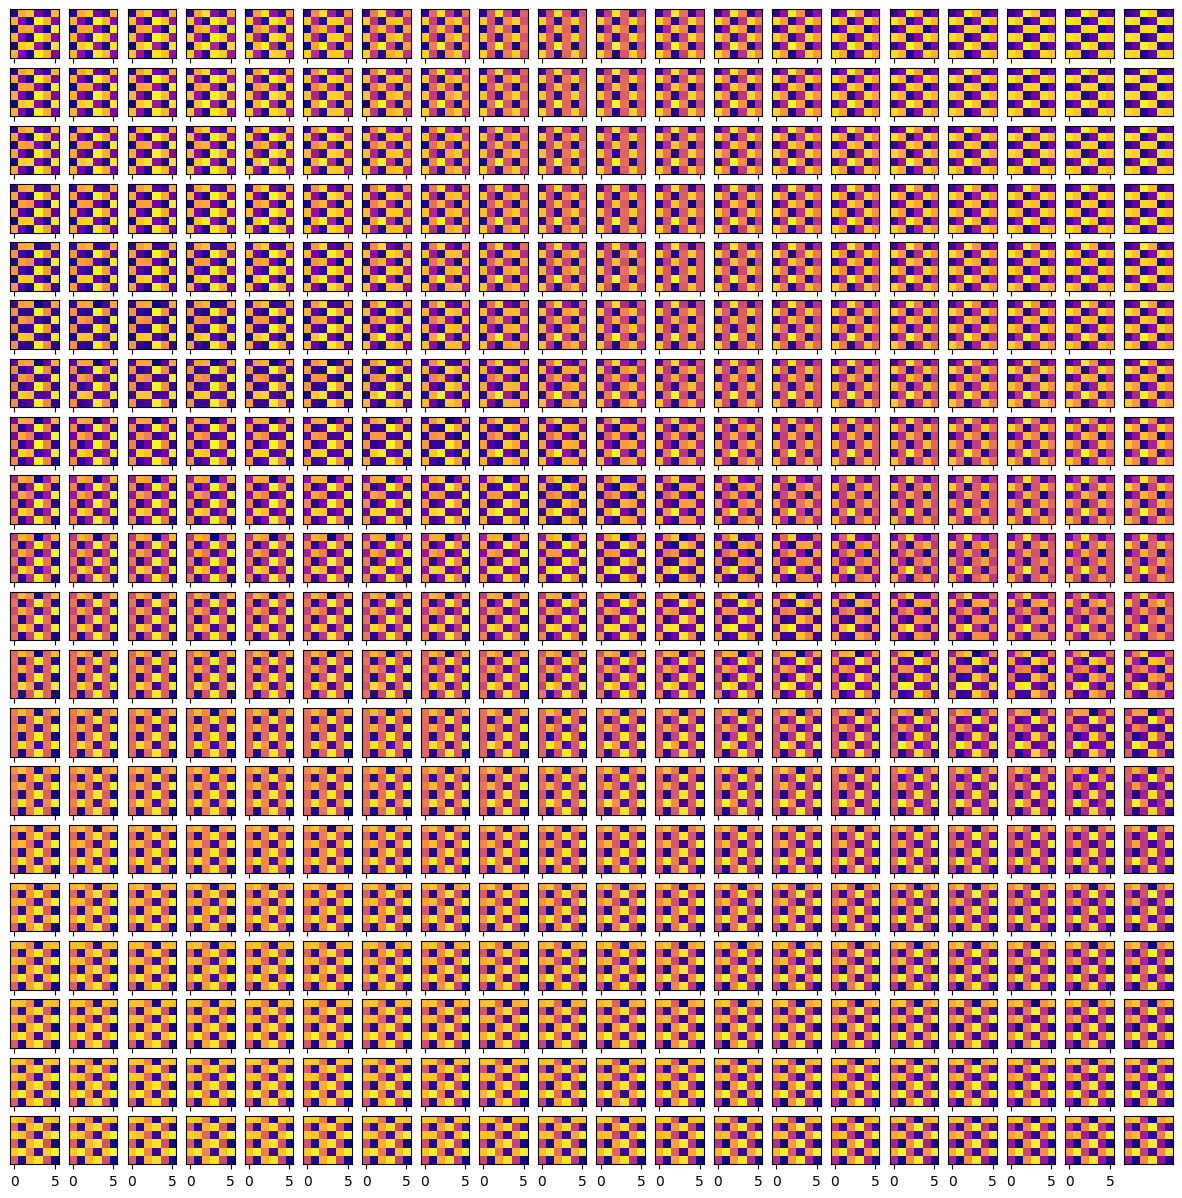

In [9]:
"""Plotting again the SOM, to see if it's well organized"""

Mon_som.plot_SOM([6,6])

In [10]:
"""Using the method confusion_matrix to calculate the confusion matrix from the SOM trained with the datas. After that, I just convert it as int"""

Confusion_Matrix = Mon_som.confusion_matrix(X_test,Y_test)
Confusion_Matrix = Confusion_Matrix.astype(int)

"""Getting the list of all the different labels, to create a visualisation of the confusion matrix"""
Labels_classes = Mon_som.different_labels

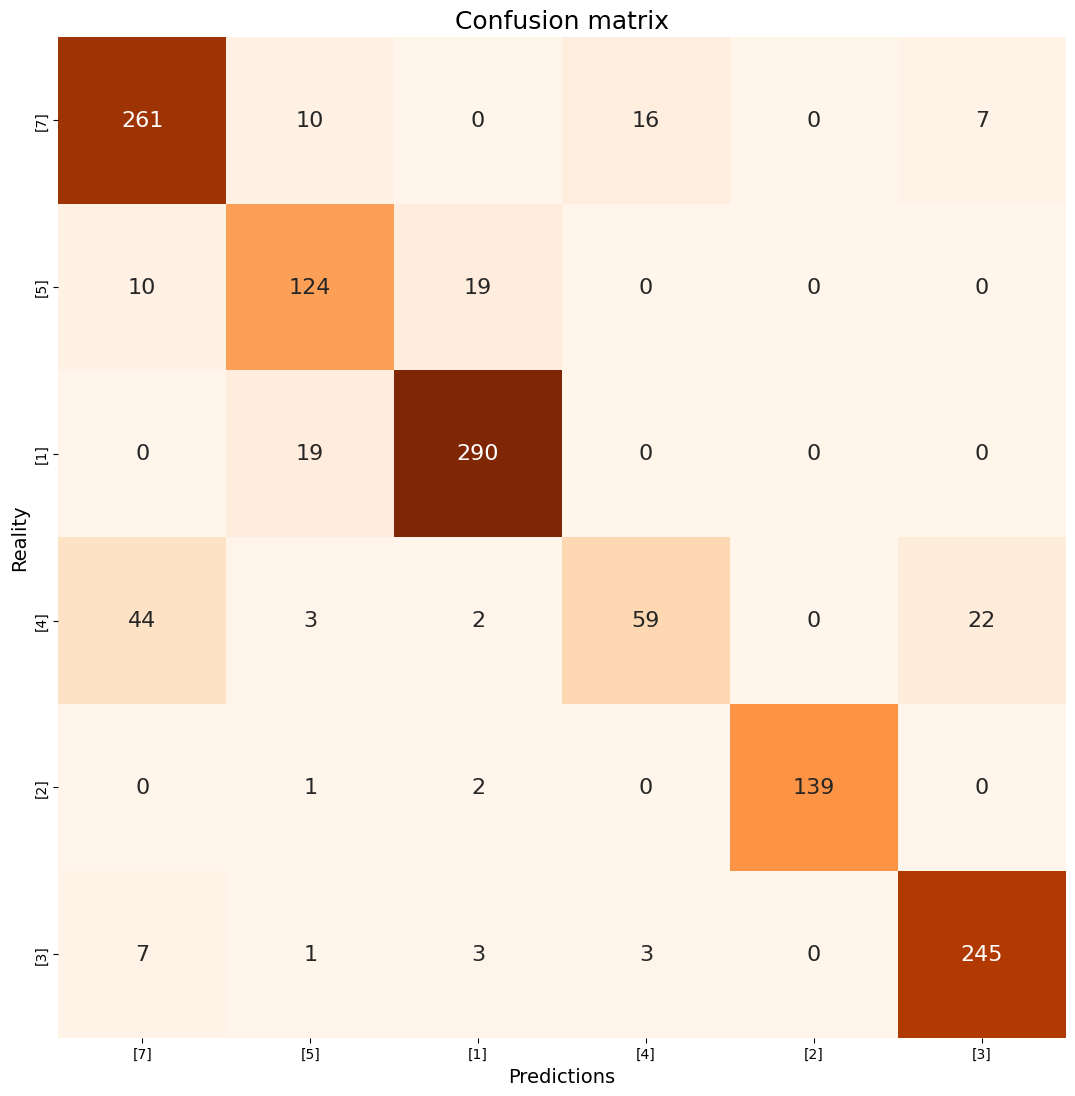

In [11]:
"""To create a good vizualisation of the confusion matrix"""

import seaborn as sns

# Création de la figure
plt.figure(figsize=(13, 13))

# Visualisation avec seaborn heatmap
sns.heatmap(Confusion_Matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=Labels_classes, yticklabels=Labels_classes
            , cbar=False, annot_kws={"size": 16})

# Titre et labels
plt.title('Confusion matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Reality', fontsize=14)

# Affichage
plt.show()


In [12]:
"""Using the function calculate_accuracy, which calculate the accuracy based on the confusion matrix"""

accuracy = calculate_accuracy(Confusion_Matrix)
print(f"Accuracy : {accuracy:.2%}")


Accuracy : 86.87%


In [13]:
"""As a final point, we calculate the best parameters, using the function optimize_params, by looping on a grid of parameters param_grid. 
It can be quite long, so we have to be smart and choose which parameters take which values wisely..."""

param_grid = {
    'eta0': [0.1,0.3,0.5],
    'n_epochs': [20],
    'n_dims': [20],
    'eta_decay': [0.01,0.5],
    'sgm0': [10],
    'sgm_decay': [0.01,0.5]
}

best_params,best_score = optimize_params(param_grid,X,Y,X_test,Y_test)

print("\nBest parameters :", best_params)
print("\nBest scores :", best_score)


Optimization : 100%
Best parameters : {'eta0': 0.1, 'eta_decay': 0.01, 'n_dims': 20, 'n_epochs': 20, 'sgm0': 10, 'sgm_decay': 0.5}

Best scores : 0.9230769230769231


In [14]:
Mon_som = SOM(len(X[0]),40, 40, 0.1, 0.01, 10, 0.5)
Mon_som.train_SOM(X)
Confusion_Matrix = Mon_som.confusion_matrix(X_test,Y_test)

"""Getting the list of all the different labels, to create a visualisation of the confusion matrix"""
Labels_classes = Mon_som.different_labels

accuracy = calculate_accuracy(Confusion_Matrix)
print(f"Accuracy : {accuracy:.2%}")

Accuracy : 96.19%
